In [1]:
import matplotlib.pyplot as plt
#from qubo_divided import solve_qubo_by_dividing


import numpy as np

import itertools

def calculate_QUBO_explicitely(Q):
    d = len(Q)

    bitstrings = list(map(np.array, list(itertools.product([0, 1], repeat=d))))

    values = []

    for bitstring in bitstrings:
        values.append(bitstring @ Q @ bitstring)

    return values#, bitstrings[np.argmin(values)]




#2 * np.random.rand(d, d) - 1

# Explicit method runtimes

In [14]:
import time 

mtx_size = range(15, 24)
times = []

for N in mtx_size:
    b = np.random.randint(-2000,2000,size=(N,N))
    b_symm = (b + b.T)/2
    t1 = time.time()
    calculate_QUBO_explicitely(b_symm)
    times.append(time.time() - t1)
    print(time.time()-t1)

0.14136815071105957
0.2675588130950928
0.5482161045074463
1.1478629112243652
2.3367791175842285
4.659264087677002
9.54183030128479
19.17251467704773
40.05858612060547
218.37013959884644


KeyboardInterrupt: 

In [54]:
best_cut = [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0]

def cut(Q):
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):

            if best_cut[i] != best_cut[j]:
            #if i== j:
                Q[i,j] = 0

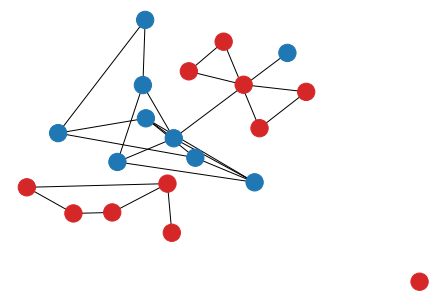

In [56]:
import networkx as nx
G = nx.from_numpy_array(Q)
#pos = nx.spring_layout(G)
color_dict = {1:"tab:red", 0: "tab:blue" }
nx.draw(G, pos = pos, node_color = [ color_dict[e] for e in best_cut] )

In [42]:
#nx.to_numpy_array()

for i in range()

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
        0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        1., 0., 1., 0.],
       [1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 0., 0.],
       [1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
        1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.

In [51]:
Q = np.loadtxt("barabasi_adj.txt", delimiter=",")
#energies = calculate_QUBO_explicitely(Q)


Text(0, 0.5, '$\\rho$(E)')

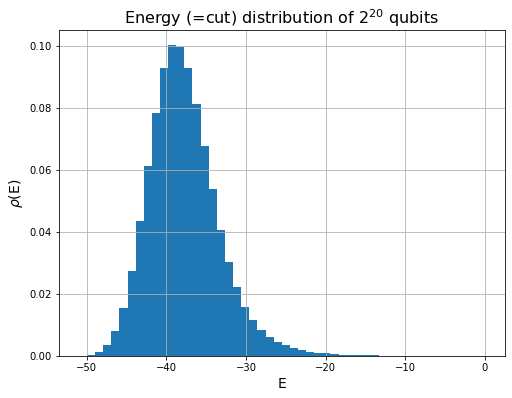

In [30]:
plt.figure(figsize=(8,6))
plt.hist(energies,bins = 50, density=True)
plt.grid()
plt.title("Energy (=cut) distribution of $2^{20}$ qubits",size=16)
plt.xlabel("E",size=14)
plt.ylabel(r"$\rho$(E)",size=14)

# 

# General symmteric matrix

In [5]:
d = 3

A, B, C, D, E, F = 5, 4, 2, 3, 1, 0


Q = np.array([  [ A, B, C], 
                [ B, D, E],
                [ C, E, F]])

# HA-assignment for 4 teams

In [2]:
Q = np.array(  [[ 0, 2,-1, 1,-2, 0],
                [ 2,-4, 2, 2, 0,-2],
                [-1, 2,-2, 0, 2,-1],
                [ 1, 2, 0,-6, 2, 1],
                [-2, 0, 2, 2,-4, 2],
                [ 0,-2,-1, 2, 2, 0]]) 

d = 6

parity: 0
parity: 1


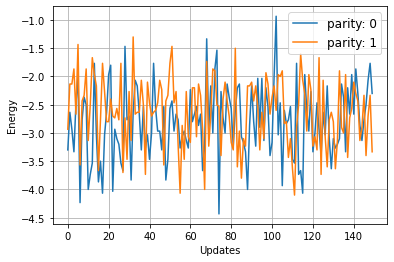

[[ 0  2 -1  1 -2  0]
 [ 2 -4  2  2  0 -2]
 [-1  2 -2  0  2 -1]
 [ 1  2  0 -6  2  1]
 [-2  0  2  2 -4  2]
 [ 0 -2 -1  2  2  0]]
Exact solution: [0, 0, -4, 0, -6, -3, -6, 1, -2, -4, -2, 0, -8, -7, -4, 1, -4, -8, -8, -8, -6, -7, -6, -3, -2, -8, -2, -4, -4, -7, 0, 1, 0, 0, -8, -4, -4, -1, -8, -1, -4, -6, -8, -6, -8, -7, -8, -3, 0, -4, -8, -8, 0, -1, -4, -1, 0, -6, -4, -6, 0, -3, 0, 1]


In [6]:

from qubo_divided import solve_qubo_by_dividing
min_energy, min_bistring = solve_qubo_by_dividing(
    Q,
    learning_rate=0.01,
    shots=60,
    updates=150,
    d_per_computer=d,
)

print(Q)
#print("Algo:", min_energy, min_bistring)





print("Exact solution:", calculate_QUBO_explicitely(Q))

In [19]:
d = 6

bitstrings = list(map(np.array, list(itertools.product([0, 1], repeat=d))))

values = []

for bitstring in bitstrings:
    values.append(bitstring @ Q @ bitstring)


In [20]:
print( [ bitstrings[idx] for idx in np.where( values == min(values) )[0] ])
print( [ values[idx] for idx in np.where( values == min(values) )[0] ])

[array([0, 0, 1, 1, 0, 0]), array([0, 1, 0, 0, 0, 1]), array([0, 1, 0, 0, 1, 0]), array([0, 1, 0, 0, 1, 1]), array([0, 1, 1, 0, 0, 1]), array([1, 0, 0, 0, 1, 0]), array([1, 0, 0, 1, 1, 0]), array([1, 0, 1, 0, 1, 0]), array([1, 0, 1, 1, 0, 0]), array([1, 0, 1, 1, 1, 0]), array([1, 1, 0, 0, 1, 0]), array([1, 1, 0, 0, 1, 1])]
[-8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8, -8]


In [21]:
z = np.array([1,0,0,1,0,0])

In [22]:
def setup_labels(z, num_teams):
    '''
    create dict of team pair - z value eg. { "12" : z_1, "13" : z_2 ...}

    z - iterable: 
    num_teams - int: 
    '''
    
    combos = []

    for i in range(0, num_teams - 1 ):
        for j in range(i, num_teams):
            if i != j:
                combos.append( str(i) + str(j) )
    return dict( zip(combos, z ) )

In [7]:
setup_labels(z, 4)      

{'01': 1, '02': 0, '03': 0, '12': 1, '13': 0, '23': 0}

In [57]:
from copy import copy

def ha_assign(timetable, z):

    assert isinstance(timetable,np.ndarray), "Timetable must be of type np.ndarray"

    ha_assignment = (np.ones_like(timetable) * -1)   # -1 for debug
    num_teams = timetable.shape[0]
    num_games = 2 * (num_teams-1)
    
    assert num_teams * (num_teams  - 1)/2 == len(z), "z vector not compatible with number of teams"
    z_labeled = setup_labels(z, num_teams)      
    
    for t_row in range( num_teams ):
        for slot in range( num_games ):
            team_1 = copy(t_row)
            team_2 = timetable[t_row, slot]

            #print(team_1, team_2)
            if team_1 > team_2:
                team_1, team_2 = team_2, team_1     # slot is in the second half of the tournament team1 is greater than team2, switch them
                label = str(team_1) + str(team_2)   # create label for lookup
                #print(label + "if")
                if slot >= (num_teams - 1):       # slot is in the second half of the tournament
                    a = z_labeled[ label ]      # 'a' is the 1 or 0 home assignment value,      y_t',s' = z
                
                else:                           # slot is in the first half of the tournament
                    a = 1 - z_labeled[ label ]                                                # y_t',s  = 1-z
                

            else:                                   # the order of teams matches the label
                label = str(team_1) + str(team_2)
                #print(label + "else")
                
                if slot >= (num_teams - 1):       # slot is in the second half of the tournament
                    a =  1 - z_labeled[ label ]                                                # y_t,s' = 1-z
                
                else:                           # slot in the first half of the tournament
                    a = z_labeled[ label ]                                                    # y_t,s  = z
                
            
            ha_assignment[t_row, slot] = a #!

    return ha_assignment

In [58]:
timetable = np.array([[2,3,4,2,3,4],
                      [1,4,3,1,4,3],
                      [4,1,2,4,1,2],
                      [3,2,1,3,2,1]])

ha = ha_assign(timetable - 1 , np.array([0,0,0,0,0,0]))
print(ha, "\n\n",timetable -1)

[[0 0 0 1 1 1]
 [1 0 0 0 1 1]
 [0 1 1 1 0 0]
 [1 1 1 0 0 0]] 

 [[1 2 3 1 2 3]
 [0 3 2 0 3 2]
 [3 0 1 3 0 1]
 [2 1 0 2 1 0]]


In [59]:
def count_breaks(timetable, z):
    ha = ha_assign(timetable, z)

    breaks = 0
    for t_row in range(ha.shape[0]):
        for slot in range(ha.shape[1]-1):
            breaks += ha[t_row, slot] * ha[t_row, slot + 1] + (1 - ha[t_row,slot]) * ( 1 - ha[t_row, slot + 1])

    return breaks

In [60]:

z = bitstrings[17]

#count_breaks(tt, )

In [61]:
"""tt2 = np.array([[2,3,4,5,6,2,3,4,5,6],
                 [1,5,6,4,3,1,5,6,4,3],
                 [4,1,5,6,2,4,1,5,6,2],
                 [3,6,1,2,5,3,6,1,2,5],
                 [6,2,3,1,4,6,2,3,1,4],
                 [5,4,2,3,1,5,4,2,3,1]])

ha_assign(tt2, np.ones(15))"""

'tt2 = np.array([[2,3,4,5,6,2,3,4,5,6],\n                 [1,5,6,4,3,1,5,6,4,3],\n                 [4,1,5,6,2,4,1,5,6,2],\n                 [3,6,1,2,5,3,6,1,2,5],\n                 [6,2,3,1,4,6,2,3,1,4],\n                 [5,4,2,3,1,5,4,2,3,1]])\n\nha_assign(tt2, np.ones(15))'

In [62]:
breaks_list = []
for  z in bitstrings:
    breaks_list.append( count_breaks(timetable -1 , z) )



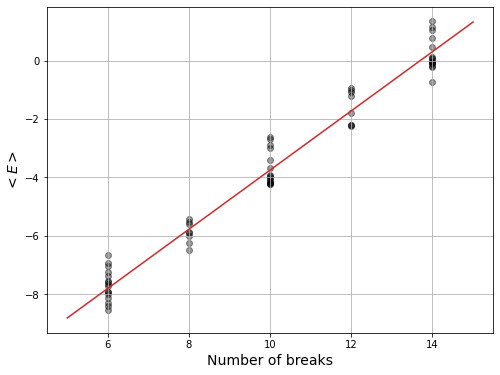

In [63]:
 

plt.figure(figsize=[8,6])
plt.grid()
plt.scatter( breaks_list, np.array(values) + 0.3 * np.random.normal(size = np.array(values).shape), alpha = .4, color = "black")
plt.xlabel("Number of breaks", size = 14)
plt.ylabel("$<E>$", size = 14)

popt = np.polyfit(breaks_list, values, 1)
_t = np.linspace(min(breaks_list) - 1, max(breaks_list) + 1, 100)
plt.plot(_t, popt[0] * _t + popt[1], color = "tab:red")
#plt.savefig("/home/user/mnt/project/src/energy-breaks4.png", dpi = 200)    

In [31]:
import pandas as pd
df = pd.DataFrame()
df["breaks_list"] = breaks_list
df["energy"] = values
df["bitstrings"] = bitstrings
df

,breaks_list,energy,bitstrings
0,14,0,"[0, 0, 0, 0, 0, 0]"
1,14,0,"[0, 0, 0, 0, 0, 1]"
2,10,-4,"[0, 0, 0, 0, 1, 0]"
3,14,4,"[0, 0, 0, 0, 1, 1]"
4,8,-6,"[0, 0, 0, 1, 0, 0]"
...,...,...,...
59,8,6,"[1, 1, 1, 0, 1, 1]"
60,14,8,"[1, 1, 1, 1, 0, 0]"
61,10,2,"[1, 1, 1, 1, 0, 1]"
62,14,20,"[1, 1, 1, 1, 1, 0]"


In [29]:
import plotly.express as px

fig = px.scatter(x = breaks_list, 
            y = np.array(values) + 0.3 * np.random.normal(size = np.array(values).shape),
            hover_data = [bitstrings])

fig.write_html("/home/user/mnt/project/src/px_break_energy_diagram.html")
fig

In [1]:
import pandas as pd

pd.DataFrame( {"breaks": breaks_list, "E": values} ).groupby("breaks").mean()

NameError: name 'breaks_list' is not defined

# Max cut

In [25]:
adjacency_matrix = np.array([[0,1,1,0,0],
                             [1,0,0,1,0],
                             [1,0,0,1,1],
                             [0,1,1,0,1],
                             [0,0,1,1,0]])

def max_cut_qubo(A):
    for i in range( A.shape[0] ):
        degree = sum(A[i,:])
        A[i, i] = - degree
    return A

In [26]:
Q = max_cut_qubo(adjacency_matrix)
Q

array([[-2,  1,  1,  0,  0],
       [ 1, -2,  0,  1,  0],
       [ 1,  0, -3,  1,  1],
       [ 0,  1,  1, -3,  1],
       [ 0,  0,  1,  1, -2]])

In [35]:
calculate_QUBO_explicitely(Q)

(-5, array([0, 1, 1, 0, 0]))

Peter Rakyta
15:10
157.181.172.79
Peter Rakyta
15:16
conda env create -f environment.yml
Peter Rakyta
15:17
source .bashrc
rb_bs2
Peter Rakyta
15:18
rp_bs2
Peter Rakyta
15:25
export PIQUASSOBOOST_DFE=1
python setup.py build_ext
Peter Rakyta
15:28
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/opt/DFE/
.bashrc
Peter Rakyta
15:32
hwloc-bind --membind node:1 --cpubind node:1 -- python boson_sampling_benchmark.py

In [27]:
from time import time

In [43]:
G = networkx.barabasi_albert_graph(node_number, initial_nodes)

array([[1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 0, 1]])

parity: 0
parity: 1


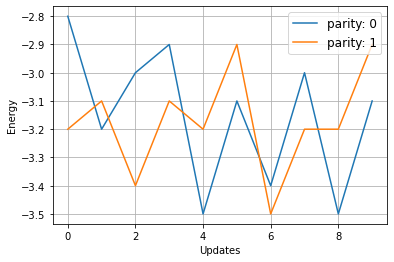

parity: 0
parity: 1


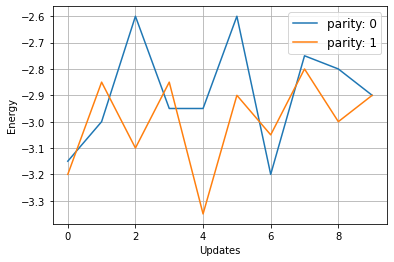

parity: 0
parity: 1


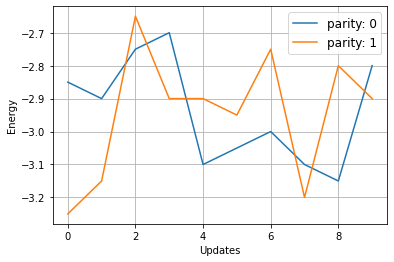

parity: 0
parity: 1


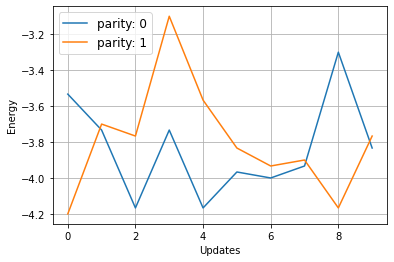

parity: 0
parity: 1


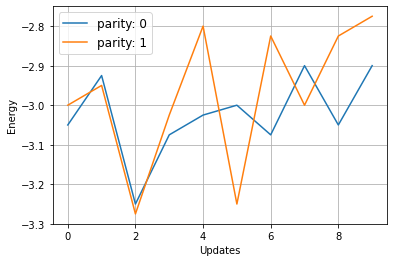

parity: 0
parity: 1


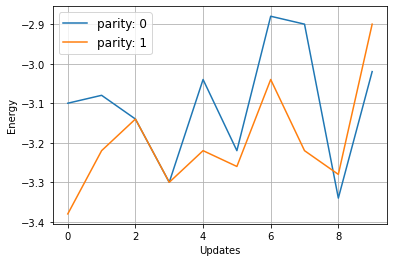

parity: 0
parity: 1


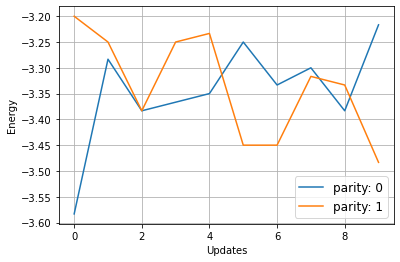

parity: 0
parity: 1


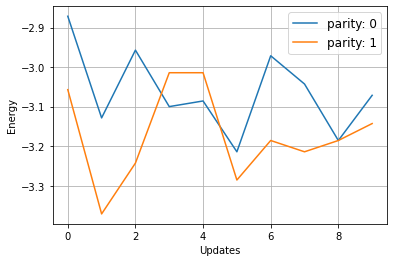

parity: 0
parity: 1


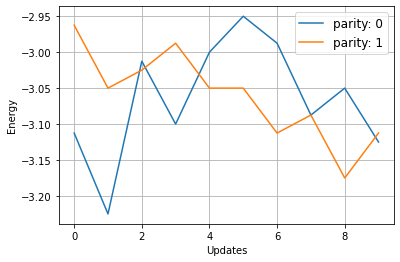

parity: 0
parity: 1


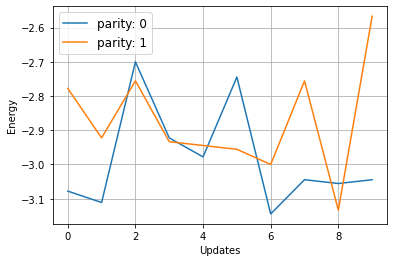

parity: 0
parity: 1


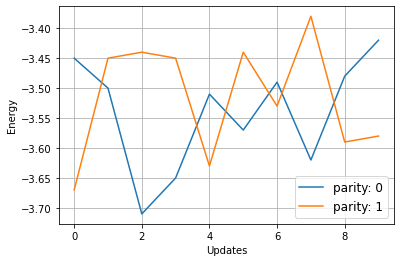

parity: 0
parity: 1


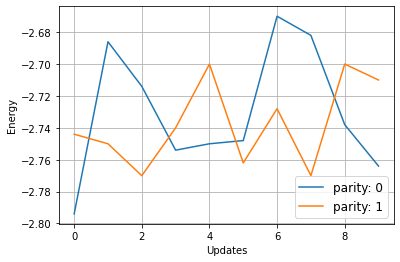

parity: 0
parity: 1


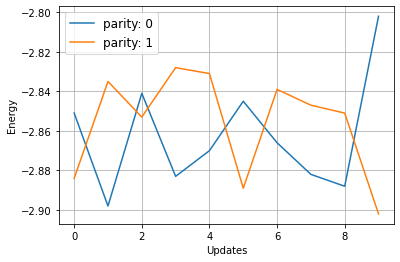

In [37]:


shot_list = [10, 20, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500, 1000]
times = []
energies = []
bs = []

for shot in shot_list:
    t1 = time()
    min_energy, min_bitstring = solve_qubo_by_dividing( Q,
    learning_rate = 0.01,
        shots = shot,
        updates = 10,
        d_per_computer= Q.shape[0]
    )
    times.append(time() - t1)
    energies.append(min_energy)
    bs.append(min_bitstring)

In [34]:
#plt.plot(shot_list, energies)
energies

[-5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5]

In [38]:
bs

[[0, 1, 1, 0, 1],
 [1, 0, 0, 1, 1],
 [1, 0, 0, 1, 1],
 [1, 0, 0, 1, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [1, 0, 0, 1, 1],
 [0, 1, 1, 0, 1],
 [1, 0, 0, 1, 1],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1],
 [1, 0, 0, 1, 1]]